### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The independent variable is whether the font name and colour were same or different and the dependent variable is the reaction time i.e. the time taken to name the ink colour.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

                    H0:μc−μi≥0

                    H1:μc−μi<0
                    
                    where, μi= population mean of incongruent values
                           μc= population mean of congruent values

Null hypothesis(H0): The null hypotheis is that the mean of the population reaction time in case of incongruent words is not significantly longer than that of the congruent words. 

Alternate hypothesis(H1):The alternative hypothesis (Ha) is that the mean of the population reaction time in case of incongruent words is significantly longer than that of the congruent words.

Statistical set: I believe carrying out Paired sample t-test would be appropriate here. This test compares means from the same group at different times.Also, since, we do not know the population standard deviation, this test seems appropriate. 

Assumption: 95% confidence interval is asssumed here( alpha=0.05)

The t statistic calculated by the test can be interpreted by comparing it to critical values from the t-distribution. The critical value can be calculated using the degrees of freedom and the significance level.

- Test Statistic <= Critical Value: Fail to reject the null hypothesis of the statistical test.
- Test Statistic => Critical Value: Reject the null hypothesis of the statistical test.

We can also retrieve the p-value which can then be compared to a chosen significance level (alpha =0.05) to determine if the null hypothesis can be rejected:

- If p > alpha: Accept null hypothesis that the means are equal.
- If p <= alpha: Reject null hypothesis that the means are equal.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("stroopdata.csv")

In [4]:
df.shape

(24, 2)

In [5]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [16]:
print('Sample mean of congruent words: ',round(df['Congruent'].mean(),4))
print('Sample mean of incongruent words: ',round(df['Incongruent'].mean(),4))

Sample mean of congruent words:  14.0511
Sample mean of incongruent words:  22.0159


In [7]:
print('Sample median of congruent words: ',df['Congruent'].median())
print('Sample median of incongruent words: ',df['Incongruent'].median())

Sample median of congruent words:  14.3565
Sample median of incongruent words:  21.0175


In [20]:
print('Sample standard deviation of congruent words: ',round(np.std(df['Congruent'],ddof=1),4)) # Adding ddof=1, to make the divisor as N-1
print('Sample standard deviation of incongruent words: ',round(np.std(df['Incongruent'],ddof=1),4))

Sample standard deviation of congruent words:  3.5594
Sample standard deviation of incongruent words:  4.7971


In [14]:
# Calculating for difference of paired data

df['Difference']=df['Incongruent']-df['Congruent']
mean_diff = df['Difference'].mean()
std_diff = df['Difference'].std()

print("Mean of difference is: {}, Standard deviation of differnce is: {}".format(round(mean_diff,4),round(std_diff,4)))

Mean of difference is: 7.9648, Standard deviation of differnce is: 4.8648


As per the above results, mean for incongruent words(14.0511) is greater than that for congreunt words(22.0159). Similarly, median is also higher for incongruent words(21.0175) than that for congruent words(14.3565). 

Standard deviation also shows similar patterns. It is greater for incongruent words(4.7971) than that for congruent words(3.5594)

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

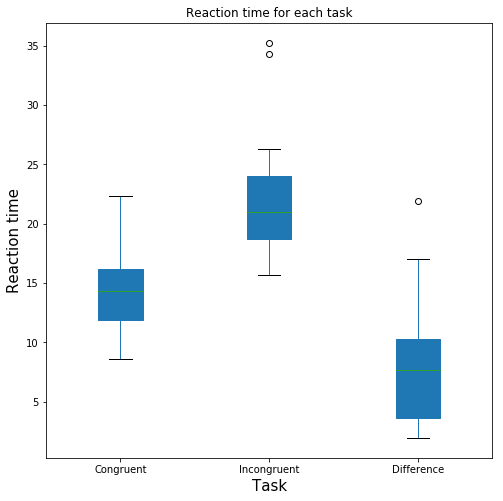

In [21]:
df.plot(kind='box',figsize=(8,8),patch_artist=True)
plt.xlabel("Task",fontsize=15)
plt.ylabel("Reaction time",fontsize=15)
plt.title("Reaction time for each task");

From the above boxplot, it is clear there are a couple of outliers for incongruent words.The median appears to be closer to the lower quartile, suggesting a poisitvely skewed distribution for incongruent words. Also, the reaction time taken for incongruent words seems to be greater than that for congruent words. This is inline with the above statsistical results.

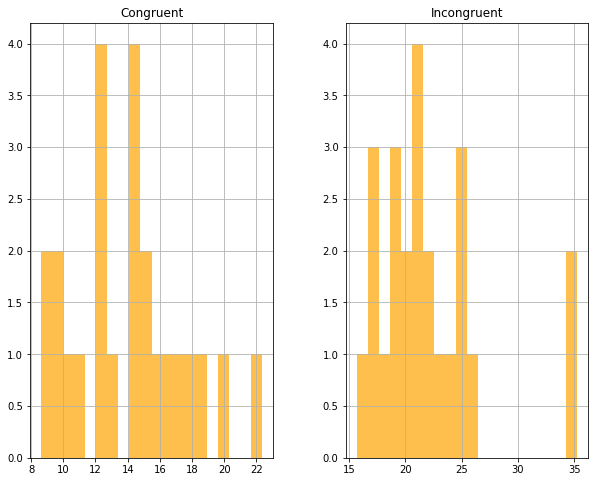

In [7]:
df.hist(bins=20,alpha=0.7,figsize=(10,8),color='orange');

The histogram for congruent words appear to have a normal distribution while that for incongruent words is a more positively distributed histogram owing to its outliers.For both the histograms, there peak values seems to be similar.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [22]:
# calculating t statistic

n=df.shape[0]

t_stat = mean_diff/(std_diff/math.sqrt(n))

print ("t value is equal to %.4f" % t_stat)

t value is equal to 8.0207


In [23]:
from scipy.stats import ttest_ind
stat,p = ttest_ind(df['Congruent'], df['Incongruent'])
print('p value is %.8f' % (p/2))

p value is 0.00000002


**t statistics value= 8.0207**

Using t distribution table we find **critical t value =2.069**

**p=0.00000002** which is much less than alphs=0.05

Since Test Statistic>Critical Value and p value is less than significance level,both the interpretations find a significant result, rejecting the null hypothesis of the statistical test in favour of alternate hypothesis(H1). Thus, we **reject the null hypothesis.**

This leads us to conculde that incongruent words does lead to greater reaction time. Hence, we can say, mean of the population reaction time in case of incongruent words is significantly longer than that of the congruent words.

These results match with my own expectation. With the reaction times I recorded for myself, incongruence did result in larger reaction times for me.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I believe, this is owing to the human behaviour. When words and colour match, it becomes easy to say out the word. However, when the mismatch occurs, our brain takes a little longer to process that information. I personally, felt I needed to be more cautious in case of incongruent words. It required a little more effort from my side.

I can think of a similar experience, when visually the food that came on my plate looked like a fruit(an appple) but it tasted nothing like the fruit. It was in fact very spicy. That experience confused my mind. I feel, that was, if not excatly an alternate task but a somewhat similar task.

## Resources

- https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/
- https://stats.stackexchange.com/questions/96553/how-to-assess-skewness-from-a-boxplot
- https://realpython.com/python-histograms/
- https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
- https://en.wikipedia.org/wiki/Stroop_effect
- https://towardsdatascience.com/statistical-tests-when-to-use-which-704557554740
- https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review